<a href="https://colab.research.google.com/github/thiagoteles10/investimento-em-propaganda-machine-learning-/blob/main/Investimento_em_propaganda(machine_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalando a biblioteca sweetviz
pip install sweetviz

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import missingno
import sweetviz as sv

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# avaliando o modelo
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore') # filtro de warnings

In [30]:
df =pd.read_csv('vendas_marketing.csv')

In [31]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Verificando informações do dataframe.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [33]:
df.shape

(200, 4)

## Fazendo unpack de linhas e colunas

In [34]:
linhas,colunas = df.shape

In [35]:
print(f'a quantidade de linhas do conjunto de dados é:  {linhas}')

a quantidade de linhas do conjunto de dados é:  200


In [36]:
print(f'a quantidade de colunas do conjunto de dados é:  {colunas}')

a quantidade de colunas do conjunto de dados é:  4


In [37]:
df.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


### Tv

In [38]:
df['TV'].describe().round(2)

count    200.00
mean     147.04
std       85.85
min        0.70
25%       74.38
50%      149.75
75%      218.82
max      296.40
Name: TV, dtype: float64

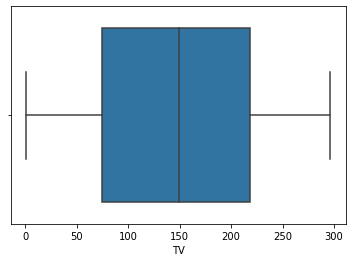

In [39]:
sns.boxplot(df['TV']);

### Newspaper

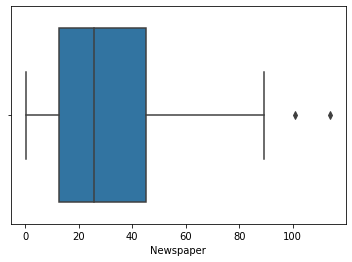

In [40]:
sns.boxplot(df['Newspaper']);

### Radio

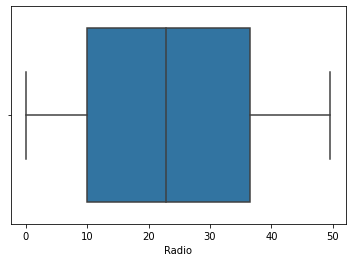

In [41]:
sns.boxplot(df['Radio']);

## Plotando o gráfico das correlações de Tv, rádio e jornais com as vendas





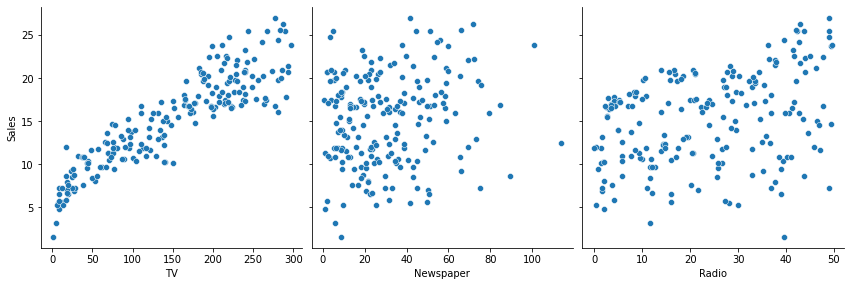

In [42]:
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4, aspect=1, kind='scatter');

### Correlação de variáveis

In [43]:
df.corr().round(2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


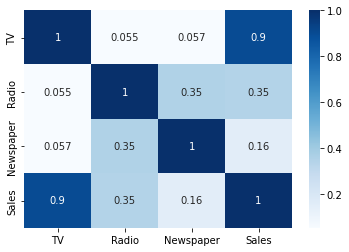

In [44]:
sns.heatmap(df.corr(),cmap='Blues', annot=True);

### Visualização automatizada

In [45]:
minha_visualizacao = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [46]:
minha_visualizacao.show_html() # mostrando todas as informações do data frame em versão html.

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


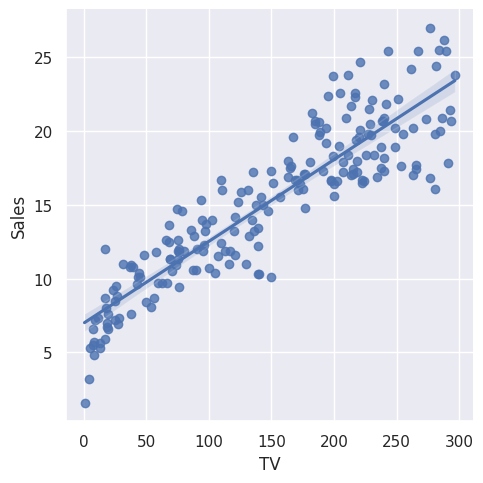

In [47]:
sns.set(color_codes=True)
sns.lmplot(data=df, x='TV', y='Sales');

### Modelo de regressão linear(machine learning)

In [48]:
X = df[['TV']]

In [49]:
y = df[['Sales']]

In [50]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Modelo de machine learning

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7, random_state=100)

In [52]:
y_train.shape

(140, 1)

In [53]:
y_test.shape

(60, 1)

In [54]:
maquina_preditiva = LinearRegression()

In [55]:
# treinando a máquina preditiva
maquina_preditiva.fit(X_train, y_train)

LinearRegression()

In [56]:
maquina_preditiva.coef_

array([[0.05454575]])

In [57]:
maquina_preditiva.intercept_

array([6.9486832])

### Predição

In [58]:
pred = maquina_preditiva.predict(X_test)

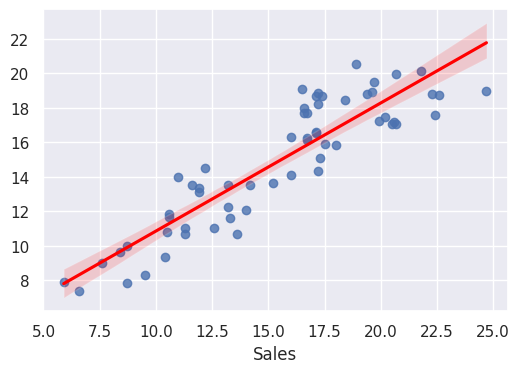

In [59]:
# plotando a variável original x variável de teste
sns.regplot(y_test, pred, line_kws={'color':'red'});

### Avaliando os modelos

In [60]:
r2 = r2_score(y_test, pred)
print(r2)

0.7921031601245662


In [61]:
mse = mean_squared_error(y_test, pred)
print(mse)

4.077556371826948


In [62]:
rmse = np.sqrt(mse)
print(rmse)

2.019296008966231


### Predição

### Informando o valor a ser investido em TV para se ter um retorno em vendas

In [63]:
investimento_em_tv = float(input('quanto quer investir na tv: '))

quanto quer investir na tv: 100


In [64]:
valor = float(maquina_preditiva.predict([[investimento_em_tv]]).round(2))

In [65]:
print(f'O valor investido foi R$ {investimento_em_tv } e o retorno foi de R$ {valor}')

O valor investido foi R$ 100.0 e o retorno foi de R$ 12.4
